## 20200527 Wensday

# Tempalte matching

In [1]:
import cv2
import numpy as np

### (1) Read Image

#### cv2.imread(filename, flag)

- flag
    
cv2.IMREAD_COLOR : Loads a color image. (1) 
    
cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode (0)
    
cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel (-1)

In [2]:
data_dir = './data/'

In [3]:
img = cv2.imread(data_dir + 'messi5.jpg', cv2.IMREAD_COLOR) #color image로 load 하겠다는 flag (1넣어도 됨)

### (2) Display Image

#### cv2.imshow(window title, array)
Display an image in a window

#### cv2.waitKey(delay)
Waits for specified milliseconds for any keyboard event

#### cv2.destroyAllWindows()
Destroys all the windows created

In [7]:
# cv2.imshow('image', img)
# k = cv2.waitKey(0)
# if k == 27:         # wait for ESC key to exit
#     cv2.destroyAllWindows()

#### Using Matplotlib
Matplotlib is a plotting library for Python which gives you wide variety of plotting methods.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

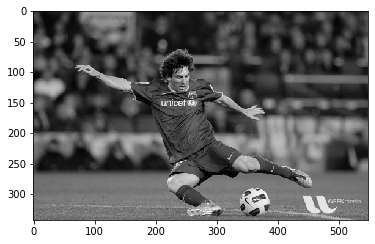

In [9]:
cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #OPENCV는 BGR순으로 들어와서 채널을 바꿔줘야함
plt.imshow(cvt_img)

# plt.imshow(img)
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

In [10]:
type(cvt_img)

numpy.ndarray

In [11]:
print(cvt_img.shape)
print(cvt_img.size)
print(cvt_img.dtype) #부호 없는 8비트 사용

(342, 548, 3)
562248
uint8


### (3) Drawing Function

Drawing Functions have some common arguments as given below:

- img : The image where you want to draw the shapes
- color : Color of the shape. For grayscale, just pass the scalar value.
- thickness : Thickness of the line or circle etc.
- lineType : Type of line

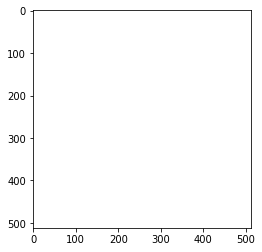

In [12]:
white_img = np.full((512, 512, 3), 255, np.uint8)
# white_img = np.zeros((512, 512, 3), np.uint8)
# white_img += 255
#흰 도화지 만듬
plt.imshow(white_img)

#### cv2.line(img, start, end, color, thickness)

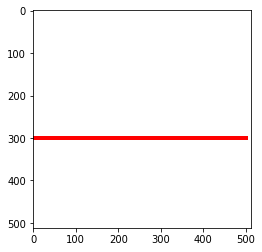

In [13]:
drawing_img = np.full((512, 512, 3), 255, np.uint8)
cv2.line(drawing_img, (0, 300), (500, 300), (255, 0, 0), 10)
#OPENCV는 가로가 먼저, 세로가 다음
#(그릴 부분, 왼쪽 위, 오른쪽 아래, 색상, 굵기 )
plt.imshow(drawing_img)

#### cv2.rectangle(img, start, end, color, thickness)

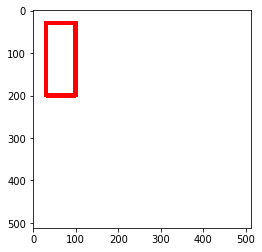

In [14]:
drawing_img = np.full((512, 512, 3), 255, np.uint8)
cv2.rectangle(drawing_img, (30, 30), (100, 200), (255, 0, 0), 10)
plt.imshow(drawing_img)

#### cv2.circle(img, center, radian, color, thickness)

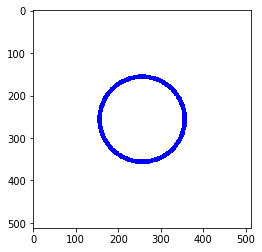

In [15]:
drawing_img = np.full((512, 512, 3), 255, np.uint8)
cv2.circle(drawing_img, (256, 256), 100, (0, 0, 255), 10)
plt.imshow(drawing_img)

#### cv2.putText(img, text, org, font, fontSacle, color)

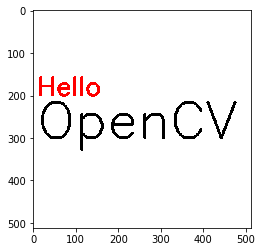

In [16]:
drawing_img = np.full((512, 512, 3), 255, np.uint8)
cv2.putText(drawing_img, 'Hello', (10,200), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0),5)
cv2.putText(drawing_img, 'OpenCV', (10,300), cv2.FONT_HERSHEY_SIMPLEX, 4, (0,0,0),5)
plt.imshow(drawing_img)

#### to do : Draw rectangle and text on Messi's face

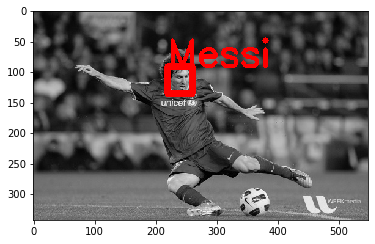

In [17]:
drawing_img = np.copy(cvt_img)
cv2.rectangle(drawing_img, (220, 90), (260, 135), (255, 0, 0), 10)
cv2.putText(drawing_img, 'Messi', (220,90), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0),5)
plt.imshow(drawing_img)

#### (4) Template collect

In [ ]:
img = cv2.imread(data_dir + 'messi5.jpg',0)
plt.imshow(img, cmap = 'gray')

In [ ]:
template = img[90:135, 220:260]
plt.imshow(template, cmap='gray')

In [ ]:
img2 = img.copy()
w, h = template.shape[::-1]
print(w,h)

### (5) Template match
#### *Template match methods *
#### https://docs.opencv.org/master/df/dfb/group__imgproc__object.html

In [18]:
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
i=1

In [19]:
img = img2.copy()

# Apply template Matching
res = cv2.matchTemplate(img,template,methods[i])
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) # 이미지에서 가장 작은 값과 큰 값의 좌표 리턴
print(min_val, max_val, min_loc, max_loc)

-0.6313074231147766 0.9999998211860657 (238, 1) (220, 90)


In [20]:
# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
if methods[i] in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
else:
    top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
print(bottom_right)

(260, 135)


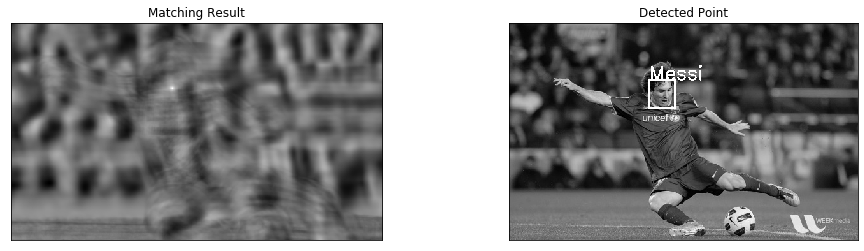

In [21]:
cv2.putText(img, 'Messi', top_left, cv2.FONT_HERSHEY_SIMPLEX, 1, 255,2)
cv2.rectangle(img,top_left, bottom_right, 255, 2)

plt.figure(figsize=(16,4))
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()

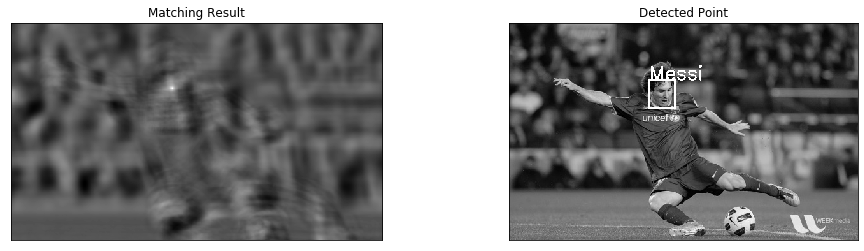

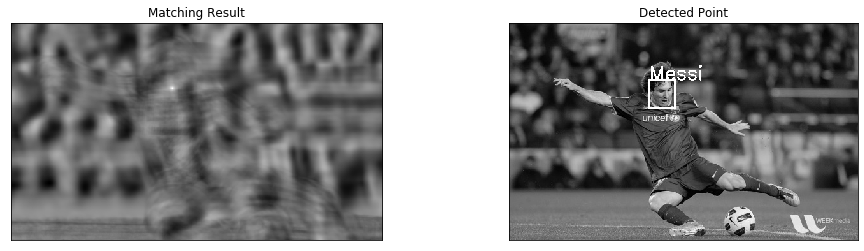

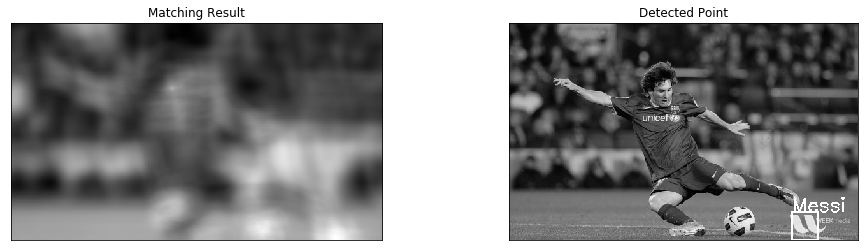

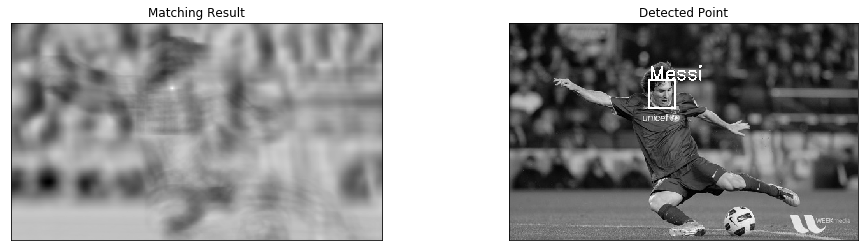

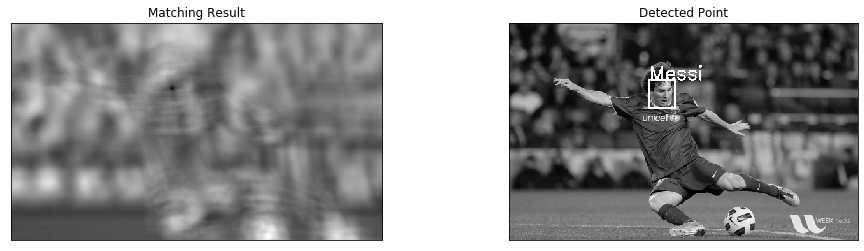

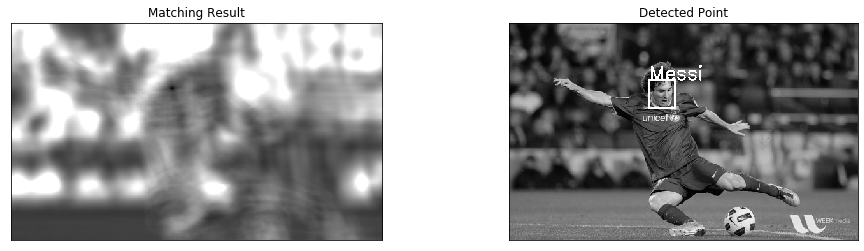

In [22]:
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

for method in methods:

    img = img2.copy()

    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.putText(img, 'Messi', top_left, cv2.FONT_HERSHEY_SIMPLEX, 1, 255,2)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.figure(figsize=(16,4))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.show()

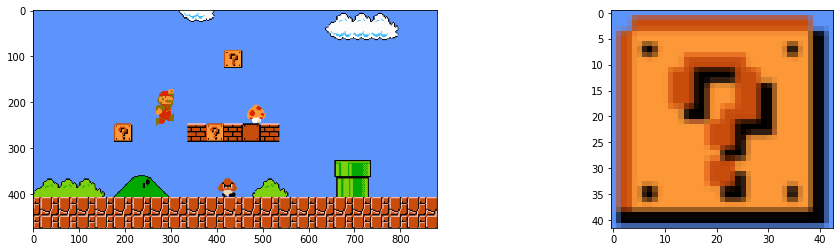

In [23]:
img_bgr = cv2.imread(data_dir + 'mario.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
coin_template = img_rgb[245:287, 175:218,:]

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.imshow(img_rgb)
plt.subplot(122)
plt.imshow(coin_template)

#### to do : Draw rectangle and text on question boxes

In [24]:
img_gray =     #convert to grayscale
box_template =    #convert to grayscale
w, h =
tm_method = cv2.TM_CCOEFF_NORMED
res =    #template matching
print(res.shape)
print(res)

SyntaxError: invalid syntax (<ipython-input-24-48c2deda19e6>, line 1)

In [25]:
threshold = 0.8
loc = #use 'np.where' #여러 좌표 출력
loc

SyntaxError: invalid syntax (<ipython-input-25-e5d196f67ae1>, line 2)

In [26]:
for pt in zip(*loc[::-1]):
    #use cv2.rentangle

plt.imshow(img_rgb)

IndentationError: expected an indented block (<ipython-input-26-e1799280789b>, line 4)

# Selective search 

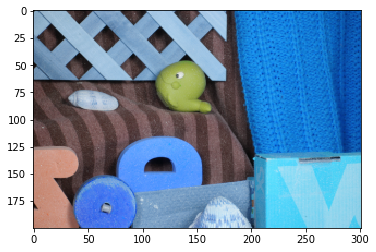

In [27]:
im = cv2.imread(data_dir + "rubberwhale1.png")
newHeight = 200
newWidth = int(im.shape[1]*200/im.shape[0])
im = cv2.resize(im, (newWidth, newHeight))    

plt.imshow(im)

In [28]:
# speed-up using multithreads
cv2.setUseOptimized(True);
cv2.setNumThreads(4);

# create Selective Search Segmentation Object using default parameters
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
 
# set input image on which we will run segmentation
ss.setBaseImage(im)
 
# Switch to fast but low recall Selective Search method
ss.switchToSelectiveSearchFast() # fast 삐르게 할건지
ss.switchToSelectiveSearchQuality() # quality 질이 좋게 할건지
 
# run selective search segmentation on input image
rects = ss.process()
print('Total Number of Region Proposals: {}'.format(len(rects)))

Total Number of Region Proposals: 1898


In [30]:
cv2.ximgproc.segmentation.createSelectiveSearchSegmentation??
# ??-> 내부 코드 확인 가능(cv2는 c++로 작성된 것이라서 확인 불가)

Docstring:
createSelectiveSearchSegmentation() -> retval
.   @brief Create a new SelectiveSearchSegmentation class.
Type:      builtin_function_or_method


In [31]:
print(rects.shape)
rects

(1898, 4)


array([[155,  19,  20,  31],
       [215, 135,  86,  65],
       [210,  72,  10,  25],
       ...,
       [  0,   0, 138,  71],
       [  0,   0, 178, 122],
       [  0,   0, 202, 137]], dtype=int32)

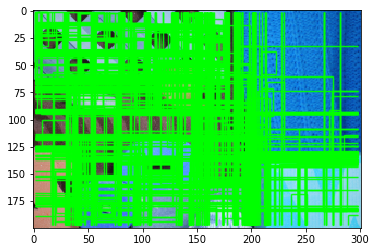

In [32]:
# number of region proposals to show
numShowRects = 1000
 
# create a copy of original image
imOut = im.copy()

# itereate over all the region proposals
for i, rect in enumerate(rects):
    # draw rectangle for region proposal till numShowRects
    if (i < numShowRects):
        x, y, w, h = rect
        cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
    else:
        break
plt.imshow(imOut)

In [33]:
def non_max_suppression_fast(boxes, probs, overlap_thresh=0.5, max_boxes=50): # 너무 많은 박스 제거(50개 걸러냄)
    if len(boxes) == 0:
        return []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

#     np.testing.assert_array_less(x1, x2)
#     np.testing.assert_array_less(y1, y2)

    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    # initialize the list of picked indexes
    pick = []

    # calculate the areas
    area = (x2 - x1) * (y2 - y1)

    # sort the bounding boxes
    idxs = np.argsort(probs)

    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the intersection

        xx1_int = np.maximum(x1[i], x1[idxs[:last]])
        yy1_int = np.maximum(y1[i], y1[idxs[:last]])
        xx2_int = np.minimum(x2[i], x2[idxs[:last]])
        yy2_int = np.minimum(y2[i], y2[idxs[:last]])

        ww_int = np.maximum(0, xx2_int - xx1_int)
        hh_int = np.maximum(0, yy2_int - yy1_int)

        area_int = ww_int * hh_int

        # find the union
        area_union = area[i] + area[idxs[:last]] - area_int

        # compute the ratio of overlap
        overlap = area_int/(area_union + 1e-6)

        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlap_thresh)[0])))

        if len(pick) >= max_boxes:
            break

    # return only the bounding boxes that were picked using the integer data type
    boxes = boxes[pick].astype("int")
    probs = probs[pick]
    return boxes, probs

In [34]:
bboxes, probs = non_max_suppression_fast(rects, np.random.normal(0.7, 0.5, (numShowRects,)))
len(bboxes)

50

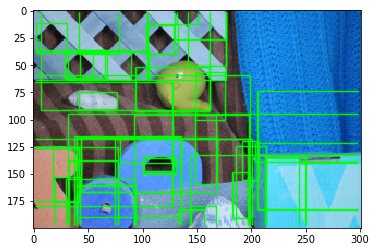

In [35]:
imOut = im.copy()

for i, rect in enumerate(bboxes):
    # draw rectangle for region proposal till numShowRects
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(imOut)